In [1]:
import pandas as pd
# reading in the data
filepath= r'C:\Users\Abdullah\Documents\Projects\Airline safety\airline-safety.csv'
flight_data= pd.read_csv(filepath)
# quick overview of the data
flight_data.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


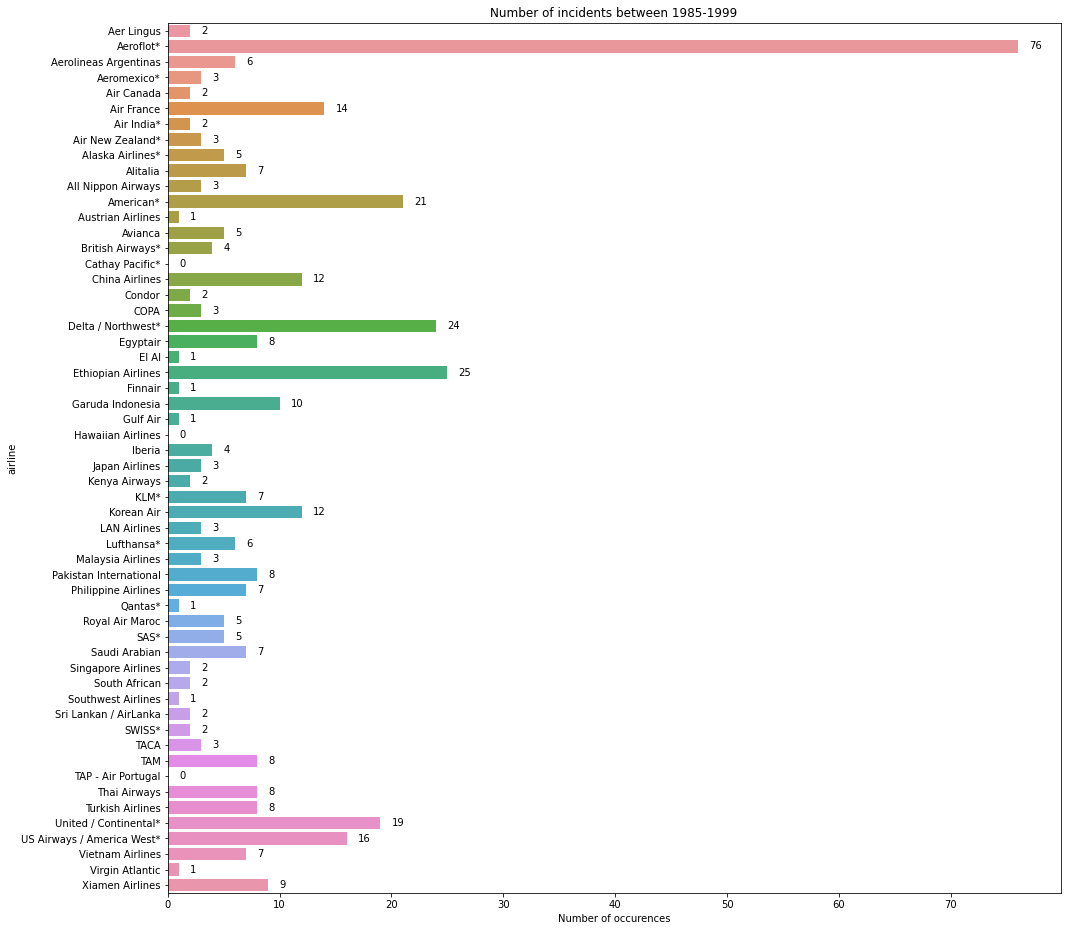

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the number of INCIDENTS between 1985-1999 across all airlines
plt.figure(figsize=(16,16))
plt.title('Number of incidents between 1985-1999')

barplot_inc= sns.barplot(x=flight_data['incidents_85_99'] ,y=flight_data['airline'])

plt.xlabel("Number of occurences");

# label each bar in barplot
for p in barplot_inc.patches:
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (average number of passengers)
 # adding text to each bar
    barplot_inc.text(x = width+1, # x-coordinate position of data label, padded 1 to right of bar
    y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
    s = '{:.0f}'.format(width), # data label, formatted to ignore decimals
    va = 'center') # sets vertical alignment (va) to center
 

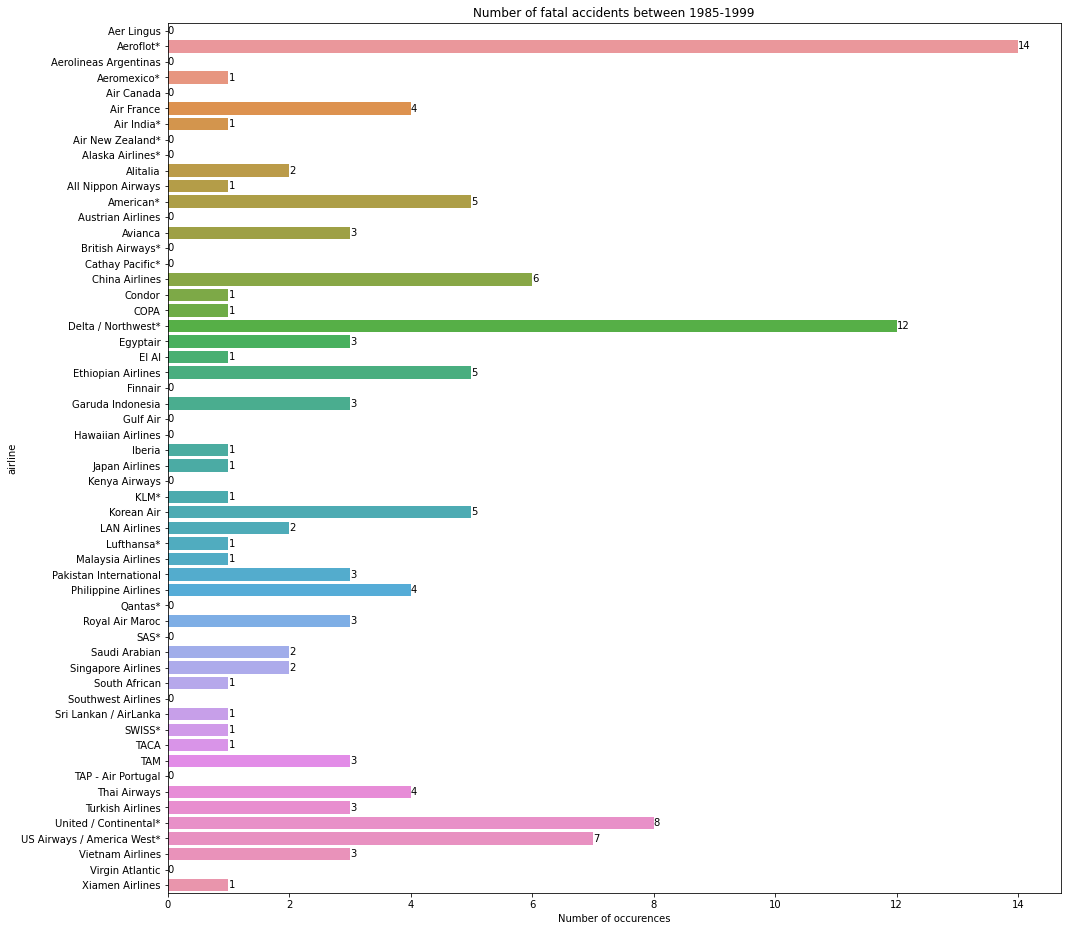

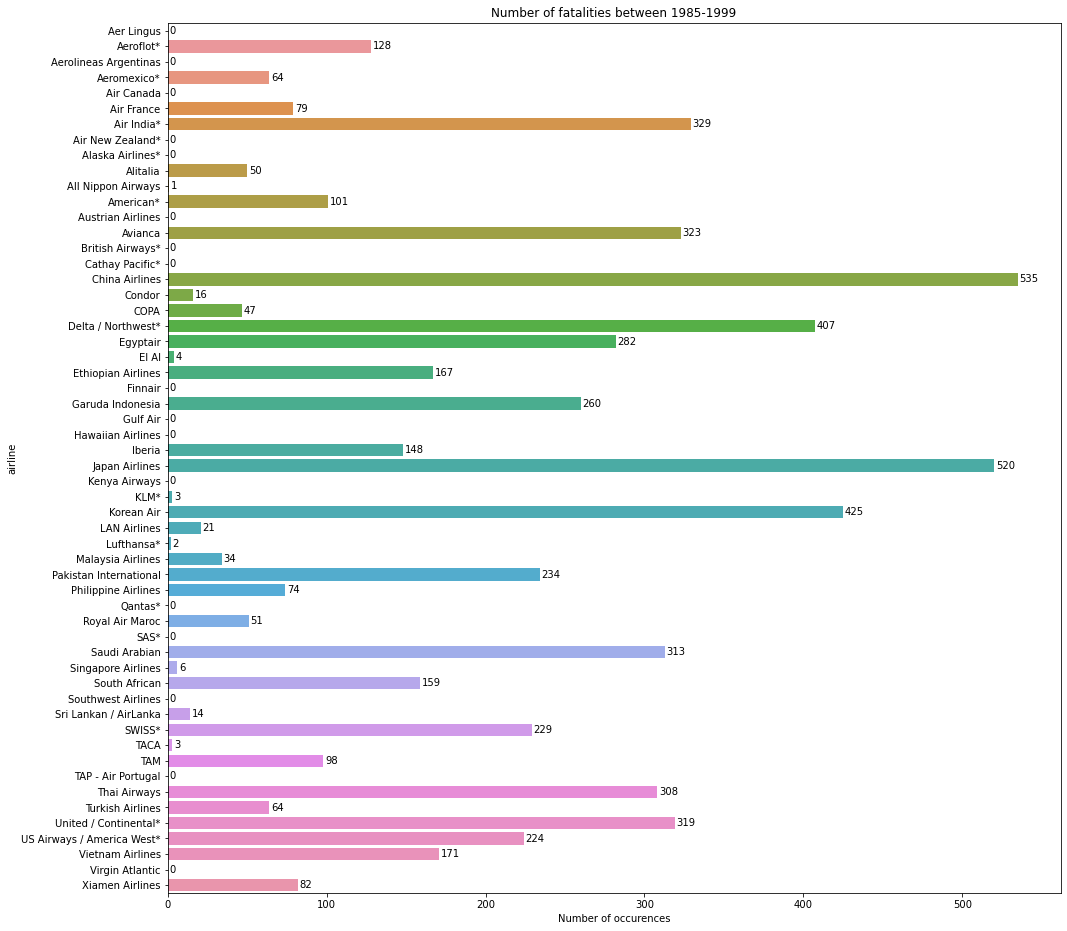

In [3]:
# Visualizing the number of FATAL ACCIDENTS between 1985-1999 across all airlines
plt.figure(figsize=(16,16))
plt.title('Number of fatal accidents between 1985-1999');

barplot_acc= sns.barplot(x=flight_data['fatal_accidents_85_99'] ,y=flight_data['airline'])

plt.xlabel("Number of occurences");

# label each bar in barplot
for p in barplot_acc.patches:
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (average number of passengers)
 # adding text to each bar
    barplot_acc.text(x = width+0, # x-coordinate position of data label
    y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
    s = '{:.0f}'.format(width), # data label, formatted to ignore decimals
    va = 'center') # sets vertical alignment (va) to center

# Visualizing the number of FATALITIES between 1985-1999 across all airlines
plt.figure(figsize=(16,16))
plt.title('Number of fatalities between 1985-1999')

barplot_fat= sns.barplot(x=flight_data['fatalities_85_99'] ,y=flight_data['airline'])

plt.xlabel("Number of occurences");

# label each bar in barplot
for p in barplot_fat.patches:
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (average number of passengers)
 # adding text to each bar
    barplot_fat.text(x = width+1, # x-coordinate position of data label, padded 1 to right of bar
    y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
    s = '{:.0f}'.format(width), # data label
    va = 'center') # sets vertical alignment (va) to center

We can see Aeroflot airline had the most number of incidents and fatal accidents however, doesn't have the most amount of fatalities. The incident count for Aeroflot is an anomaly as it's a lot higher than the average number of incidents for other airlines.

**The most deadliest airline is China airlines with 535 fatalities albeit having only 6 fatal accidents.
The least deadliest is TAP, Hawaii Airlines and Cathay Pacific as they have 0 incidents and hence 0 fatalties**



In [5]:
from IPython.display import display_html 
# Dropping all columns except airline and fatalities (1985 data)
flightDataFatalities_85= flight_data.drop(['avail_seat_km_per_week','incidents_85_99','fatal_accidents_85_99','incidents_00_14','fatal_accidents_00_14','fatalities_00_14'], axis=1)
# Dropping all columns except airline and fatalities (2000 data)
flightDataFatalities_00= flight_data.drop(['avail_seat_km_per_week','incidents_85_99','fatal_accidents_85_99','incidents_00_14','fatal_accidents_00_14','fatalities_85_99'], axis=1)

# Setting the top 5 airlines with highest fatalities (1985 data)
highest_85 = flightDataFatalities_85.nlargest(5,'fatalities_85_99')

# Setting the top 5 airlines with highest fatalities (2000 data)
highest_00 = flightDataFatalities_00.nlargest(5,'fatalities_00_14')

# Styling the dataframes so they appear side by side
flightDataFatalities_85_styler = highest_85.style.set_table_attributes("style='display:inline'").set_caption('Top 5 airlines with highest fatalities (1985-1999)')
flightDataFatalities_00_styler = highest_00.style.set_table_attributes("style='display:inline'").set_caption('Top 5 airlines with highest fatalities (2000-2014)')

space = "\xa0" * 10 # adding a space between the dataframes
display_html(flightDataFatalities_85_styler._repr_html_()+space+flightDataFatalities_00_styler._repr_html_(), raw=True)

,airline,fatalities_85_99
16,China Airlines,535
28,Japan Airlines,520
31,Korean Air,425
19,Delta / Northwest*,407
6,Air India*,329
,airline,fatalities_00_14
34,Malaysia Airlines,537
11,American*,416
5,Air France,337
29,Kenya Airways,283


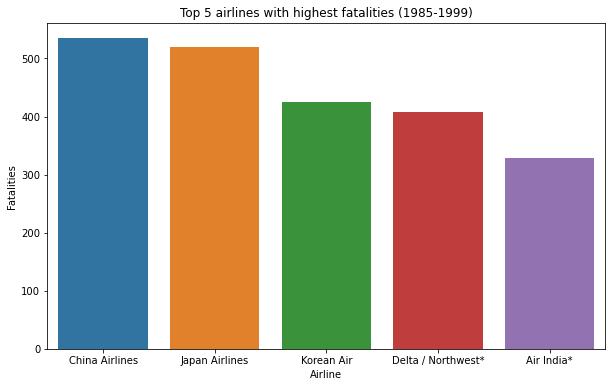

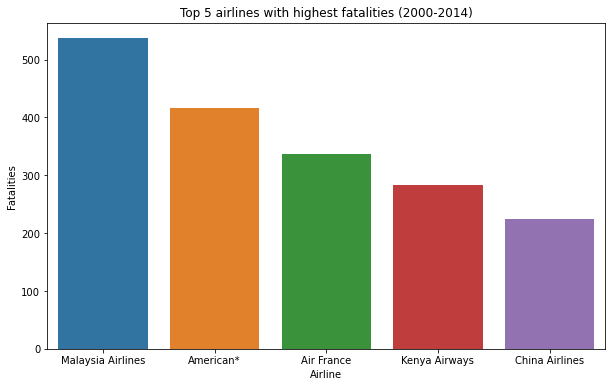

In [7]:
# Visualizing the 5 airlines with highest fatalities for 1985-1999 and 2000-2014
plt.figure(figsize=(10,6))
sns.barplot(x=highest_85['airline'], y=highest_85['fatalities_85_99'])
plt.title('Top 5 airlines with highest fatalities (1985-1999)')
plt.xlabel('Airline');
plt.ylabel('Fatalities');

plt.figure(figsize=(10,6))
sns.barplot(x=highest_00['airline'], y=highest_00['fatalities_00_14'])
plt.title('Top 5 airlines with highest fatalities (2000-2014)')
plt.xlabel('Airline');
plt.ylabel('Fatalities');

In 2000 - 14 the airline with the most fatalities was malaysian airlines followied by American airlines. China airlines was at the top in 1985 - 99 however, it took the 5th spot in 2000 - 14

One could choose to avoid flying on airlines with higher probability of incidents and fatalities.

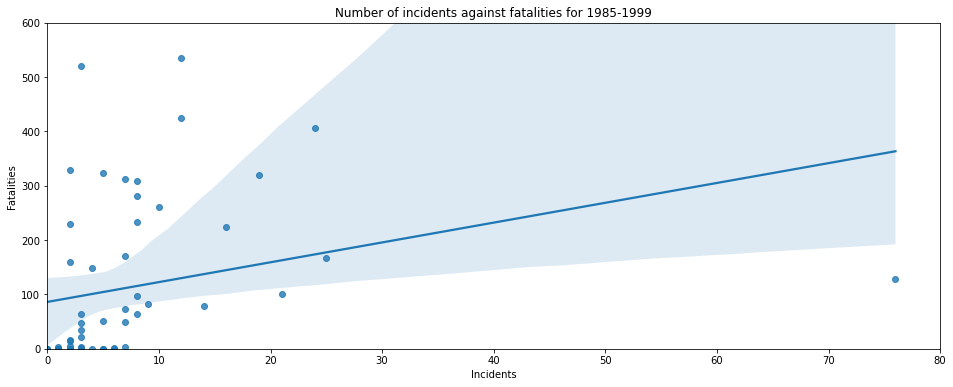

In [8]:
# Now let's visualize the correlation between number of incidents and fatalities for the 1985 - 1999 data
plt.figure(figsize=(16,6))
plt.title('Number of incidents against fatalities for 1985-1999');
sns.regplot(x=flight_data['incidents_85_99'], y=flight_data['fatalities_85_99'])
plt.xlabel('Incidents');
plt.ylabel('Fatalities');

#Setting axes limits
plt.axis([0, 80, 0, 600]);


The data is largely concentrated to the bottom left of the graph indicating small number of incidents across a bigger number of different airlines.

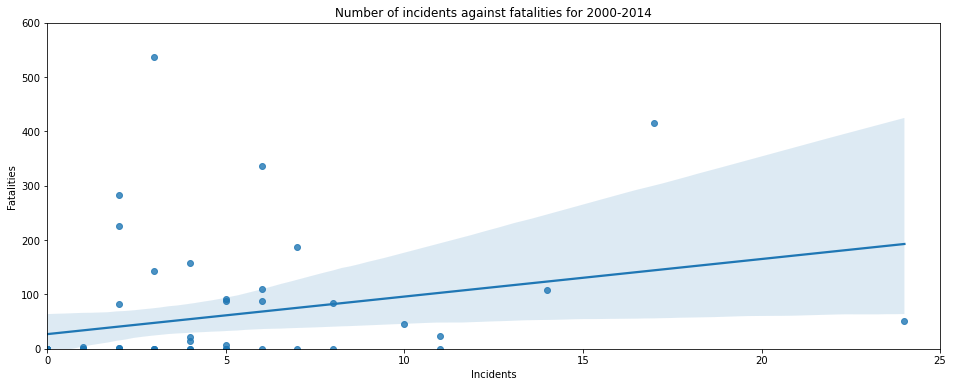

In [9]:
# We'll do the same as above but for the 2000-2014 data
plt.figure(figsize=(16,6))

plt.title('Number of incidents against fatalities for 2000-2014')
sns.regplot(x=flight_data['incidents_00_14'], y=flight_data['fatalities_00_14'])
plt.xlabel('Incidents');
plt.ylabel('Fatalities');

plt.axis([0, 25, 0, 600]);

The number of incidents to number of fatalities in 2000-2014 don't correlate as much as the airlines in 1985-1999 as the gradient of the regression line for 2000-2014 is less steeper than for 1989-99

We can also see that there are a less variety of airlines that had incidents in 2000-2014 than between 1989-1999. However for the airlines that do have incidents their number is high, indicating poor management for those particular airlines.

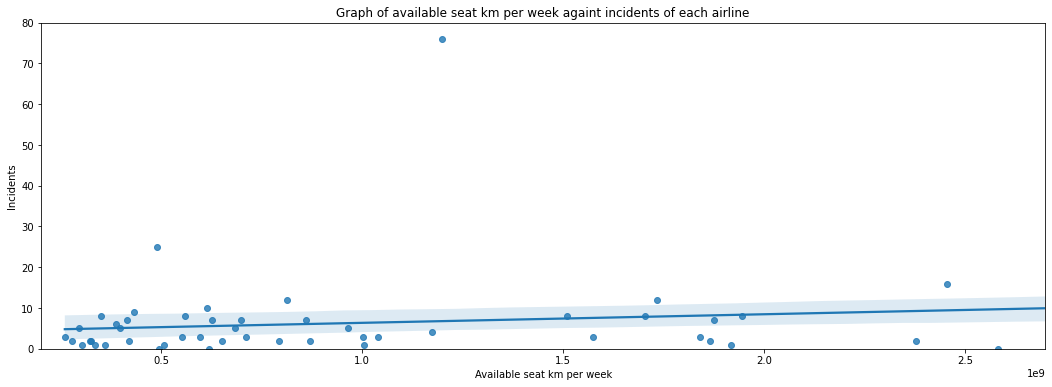

In [10]:
plt.figure(figsize=(18,6))
plt.title('Graph of available seat km per week againt incidents of each airline')
sns.regplot(x=flight_data['avail_seat_km_per_week'],y=flight_data['incidents_85_99'])
plt.xlabel('Available seat km per week') # defined as the number of seats multiplied by the number of kilometers the airline flies
plt.ylabel('Incidents')


plt.axis([200000000, 2700000000	, 0, 80]);


There doesnt seem to be much correlation between the available seat km and the number of incidents for each airline. We could justify the slight positve correlation by assuming that a higher number of km flown leads to more incidents. However, this may be wrong as the anomaly (the airline with over 70 incidents) could have skewed the regression line.